In [1]:
import io
import pandas as pd
import pingouin as pg
from pingouin import welch_anova, read_dataset
import numpy as np
import scipy.stats as stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)



df = pd.read_csv('../data/crowdsourced/accs_general_total.csv', sep="\t")

df['id'] = df.index
df.head(3)

/Users/user/miniconda3/envs/exaggerated_language/lib/python3.6/site-packages/requests/__init__.py:104: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  RequestsDependencyWarning)
/Users/user/miniconda3/envs/exaggerated_language/lib/python3.6/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.12, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/Users/user/miniconda3/envs/exaggerated_language/lib/python3.6/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


,distro,acc,diff_bias,section_type,setup,id
0,0:0,0.27,without,1,1,0
1,0:0,0.33,without,2,1,1
2,0:0,0.58,without,3,1,2


In [2]:
print((np.var(df.query('setup==1')['acc'].tolist()), np.var(df.query('setup==2')['acc'].tolist())))

(0.02316232638888889, 0.013958159722222219)


In [3]:
model_covered = df.query('setup==1')['acc'].tolist()
model_revealed = df.query('setup==2')['acc'].tolist()

In [4]:
from scipy import stats
t = stats.ttest_ind(model_covered, model_revealed, equal_var = False)

In [5]:
t[1]<0.5

True

([<matplotlib.axis.XTick at 0x7fc1901400b8>,
 [Text(0, 0, ''), Text(1, 0, '')])

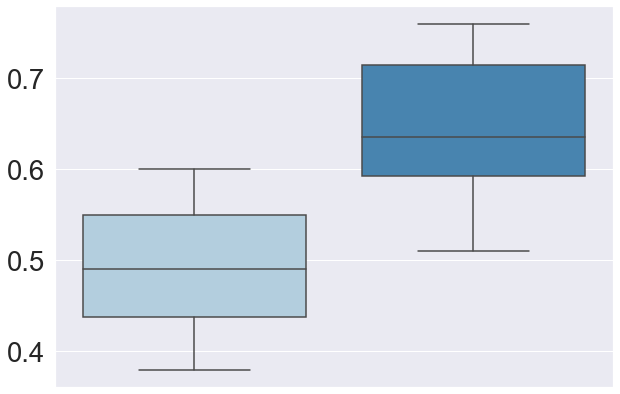

In [6]:
sns.set_theme()
sns.set(font_scale=2.5)  
np.random.seed(111)
plt.figure(figsize=(10,7))
all_sections_1 = [0.46, 0.43, 0.38, 0.52, 0.60, 0.56]
all_sections_2 = [0.51, 0.60, 0.59, 0.67, 0.73, 0.76]
sns.boxplot(data=[all_sections_1, all_sections_2],  palette="Blues")
plt.xticks([0, 1], ['', ''])